In [1]:
# cleaner version that produces cluster efficiency hists and save to ROOT files and plots

import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections
import uproot
from collections import OrderedDict
import uproot
import pandas as pd
import os
import scipy
import awkward
import numpy as np
import time
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
import math
from array import array
import CMS_lumi, tdrstyle
style = tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0

wH = 1
Z_MASS = 91.2


# donotdelete = []
print(sys.version)

Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


# load ntuples

In [16]:
%%time


m = '55'
lumi = [ 35.9, 41.5, 59.7 ]
year='MC_Fall18'
masses = ['15','40','55','5']
m = '15'
analyzer = '74'
file = {}
tree = {}

# path = "/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/"+year+"/v2/v93/normalized/"


# file['4Tau_m15'] = path + 'ggH_HToSSTo4Tau_MH-125_MS-15.root'
# file['4Tau_m40'] = path + 'ggH_HToSSTo4Tau_MH-125_MS-40.root'
# file['4Tau_m55'] = path + 'ggH_HToSSTo4Tau_MH-125_MS-55.root'
version = 'v114'

# path = "/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/"+year+"/v2/v102/normalized/"
# path = '/storage/cms/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18_FullGenParticles/v1/'+version+'/normalized/'
path = '/storage/af/user/christiw/login-1/christiw/LLP/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18_FullGenParticles/v1/v114/normalized/'
file['4Tau'] = path + 'ggH_HToSSTo4Tau_MH-125.root'

# file['4d'] = path + 'ggH_HToSSTodddd_MH-125.root'



# file['4Tau_m7'] = path + 'ggH_HToSSTo4Tau_MH-125_MS-7.root'
# file['4Tau_m15'] = path + 'ggH_HToSSTo4Tau_MH-125_MS-15.root'
# file['4Tau_m40'] = path + 'ggH_HToSSTo4Tau_MH-125_MS-40.root'
# file['4Tau_m55'] = path + 'ggH_HToSSTo4Tau_MH-125_MS-55.root'

# lumi = '137000'
# for decay in ['4Tau', 'dddd']:
#     for m in [7, 15, 40, 55]:
#         for ct in [100,1000,10000,100000]:
#             file[decay+'_m'+str(m)+'_'+str(ct)] = path + 'ggH_HToSSTo'+decay+'_MH-125_MS-'+str(m)+'_ctau-'+str(ct)+'_TuneCP5_13TeV-powheg-pythia8_'+lumi+'pb_weighted.root'


# file['test']='/storage/cms/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18/v2/v119/normalized/ggH_HToSS_SToGammaGamma_ms1p0_pl125_137000pb_weighted.root'
# path = '/storage/af/user/christiw/login-1/christiw/LLP/displacedJetMuonAnalyzer/normalized/'
path = '/storage/af/user/christiw/login-1/christiw/LLP/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18/v2/v119/normalized/'

# file['ggH_HToSS_STodd_ms3p0_pl500'] = path + 'ggH_HToSS_STodd_ms3p0_pl500_137000pb_weighted.root'
# file['ggH_HToSS_STodd_ms3p0_pl100'] = path + 'ggH_HToSS_STodd_ms3p0_pl500_137000pb_weighted.root'

# file['ggH_HToSS_SToGlueGlue_ms3p0_pl100'] = path + 'ggH_HToSS_SToGlueGlue_ms3p0_pl100_137000pb_weighted.root'
# file['ggH_HToSS_SToGlueGlue_ms3p0_pl500'] = path + 'ggH_HToSS_SToGlueGlue_ms3p0_pl500_137000pb_weighted.root'
# file['ggH_HToSS_SToPi0Pi0_ms0p4_pl10'] = path + 'ggH_HToSS_SToPi0Pi0_ms0p4_pl10_137000pb_weighted.root'
# file['ggH_HToSS_SToPi0Pi0_ms0p4_pl50'] = path + 'ggH_HToSS_SToPi0Pi0_ms0p4_pl50_137000pb_weighted.root'
# file['ggH_HToSS_SToPi0Pi0_ms1p0_pl125'] = path + 'ggH_HToSS_SToPi0Pi0_ms1p0_pl125_137000pb_weighted.root'
# file['ggH_HToSS_SToPi0Pi0_ms1p0_pl25'] = path + 'ggH_HToSS_SToPi0Pi0_ms1p0_pl25_137000pb_weighted.root'

file['ggH_HToSS_SToEE_ms0p4_pl10'] = path + 'ggH_HToSS_SToEE_ms0p4_pl10_137000pb_weighted.root'
file['ggH_HToSS_SToEE_ms0p4_pl50'] = path + 'ggH_HToSS_SToEE_ms0p4_pl50_137000pb_weighted.root'
file['ggH_HToSS_SToEE_ms1p0_pl125'] = path + 'ggH_HToSS_SToEE_ms1p0_pl125_137000pb_weighted.root'
file['ggH_HToSS_SToEE_ms1p0_pl25'] = path + 'ggH_HToSS_SToEE_ms1p0_pl25_137000pb_weighted.root'
file['ggH_HToSS_SToEE_ms2p0_pl250'] = path + 'ggH_HToSS_SToEE_ms2p0_pl250_137000pb_weighted.root'
file['ggH_HToSS_SToEE_ms2p0_pl50'] = path + 'ggH_HToSS_SToEE_ms2p0_pl50_137000pb_weighted.root'
file['ggH_HToSS_SToEE_ms4p0_pl100'] = path + 'ggH_HToSS_SToEE_ms4p0_pl100_137000pb_weighted.root'
file['ggH_HToSS_SToEE_ms4p0_pl500'] = path + 'ggH_HToSS_SToEE_ms4p0_pl500_137000pb_weighted.root'

# file['ggH_HToSS_SToGammaGamma_ms0p4_pl10'] = path + 'ggH_HToSS_SToGammaGamma_ms0p4_pl10_137000pb_weighted.root'
# file['ggH_HToSS_SToGammaGamma_ms0p4_pl50'] = path + 'ggH_HToSS_SToGammaGamma_ms0p4_pl50_137000pb_weighted.root'
# file['ggH_HToSS_SToGammaGamma_ms1p0_pl125'] = path + 'ggH_HToSS_SToGammaGamma_ms1p0_pl125_137000pb_weighted.root'
# file['ggH_HToSS_SToGammaGamma_ms1p0_pl25'] = path + 'ggH_HToSS_SToGammaGamma_ms1p0_pl25_137000pb_weighted.root'
# file['ggH_HToSS_SToGammaGamma_ms2p0_pl250'] = path + 'ggH_HToSS_SToGammaGamma_ms2p0_pl250_137000pb_weighted.root'
# file['ggH_HToSS_SToGammaGamma_ms2p0_pl50'] = path + 'ggH_HToSS_SToGammaGamma_ms2p0_pl50_137000pb_weighted.root'
# file['ggH_HToSS_SToGammaGamma_ms4p0_pl100'] = path + 'ggH_HToSS_SToGammaGamma_ms4p0_pl100_137000pb_weighted.root'
# file['ggH_HToSS_SToGammaGamma_ms4p0_pl500'] = path + 'ggH_HToSS_SToGammaGamma_ms4p0_pl500_137000pb_weighted.root'

file['ggH_HToSS_SToPiPlusPiMinus_ms0p4_pl10'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms0p4_pl10_137000pb_weighted.root'
file['ggH_HToSS_SToPiPlusPiMinus_ms0p4_pl50'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms0p4_pl50_137000pb_weighted.root'
file['ggH_HToSS_SToPiPlusPiMinus_ms1p0_pl125'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms1p0_pl125_137000pb_weighted.root'
file['ggH_HToSS_SToPiPlusPiMinus_ms1p0_pl25'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms1p0_pl25_137000pb_weighted.root'
file['ggH_HToSS_SToPiPlusPiMinus_ms2p0_pl250'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms2p0_pl250_137000pb_weighted.root'
file['ggH_HToSS_SToPiPlusPiMinus_ms2p0_pl50'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms2p0_pl50_137000pb_weighted.root'
file['ggH_HToSS_SToPiPlusPiMinus_ms4p0_pl100'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms4p0_pl100_137000pb_weighted.root'
file['ggH_HToSS_SToPiPlusPiMinus_ms4p0_pl500'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms4p0_pl500_137000pb_weighted.root'









for k, v in file.items():
    tree[k] = uproot.open(v)['MuonSystem']
    print(np.mean(tree[k].array('gLLP_ctau')))
    print(k,v)

686.4573
4Tau /storage/af/user/christiw/login-1/christiw/LLP/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18_FullGenParticles/v1/v114/normalized/ggH_HToSSTo4Tau_MH-125.root
nan
ggH_HToSS_SToEE_ms0p4_pl10 /storage/af/user/christiw/login-1/christiw/LLP/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18/v2/v119/normalized/ggH_HToSS_SToEE_ms0p4_pl10_137000pb_weighted.root
nan
ggH_HToSS_SToEE_ms0p4_pl50 /storage/af/user/christiw/login-1/christiw/LLP/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18/v2/v119/normalized/ggH_HToSS_SToEE_ms0p4_pl50_137000pb_weighted.root
9.572499
ggH_HToSS_SToEE_ms1p0_pl125 /storage/af/user/christiw/login-1/christiw/LLP/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18/v2/v119/normalized/ggH_HToSS_SToEE_ms1p0_pl125_137000pb_weighted.root
3.4878187
ggH_HToSS_SToEE_ms1p0_pl25 /storage/af/user/christiw/login-1/christiw/LLP/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18/v2/v119/normalized/ggH_HToSS_SToEE_ms1p0_pl25_137000pb_weighted.root
20.637604
ggH_HToSS_SToEE_ms2p0_pl250 /storage/af

In [17]:
def dPhi(x):
    while np.count_nonzero(x>math.pi)>0:
        x[x>math.pi] = x[x>math.pi]-2*math.pi
    while np.count_nonzero(x<-math.pi)>0:
        x[x<-math.pi] = x[x<-math.pi]+2*math.pi
    return x

# load branches

In [18]:
%%time

cut_based = True
cut_based_version='v4'
nCsc_cut = 130

llp_r = {}
llp_z = {}
llp_e ={}
llp_pz = {}
llp_ez = {}
llp_p = {}
llp_gamma = {}
clusterR = {}
clusterZ = {}
clusterE = {}
clusterPz = {}
clusterEz = {}
clusterP = {}
clusterGamma = {}
clusterSize = {}
llp_emfracP = {}
llp_emfracPz = {}
llp_emfracE = {}
llp_emfracEz = {}
clusterEMFracP = {}
clusterEMFracPz = {}
clusterEMFracE = {}
clusterEMFracEz = {}
nCluster = {}

llp_EMP = {}
llp_EMPz = {}
llp_EME= {}
llp_EMEz= {}

llp_HadP= {}
llp_HadPz= {}
llp_HadE= {}
llp_HadEz= {}

clusterEMP= {}
clusterEMPz= {}
clusterEME= {}
clusterEMEz= {}

clusterHadP= {}
clusterHadPz= {}
clusterHadE= {}
clusterHadEz= {}
evtNum = {}
llp_visFracE= {}
cluster_visFracE={}
higgsPt_denom = {}
higgsPt_nom = {}
llp_ctau = {}
llp_multiplicity = {}
cluster_multiplicity = {}
weight_nom = {}
weight = {}
clusterme1112= {}
llp_eta = {}
cluster_llp_eta = {}
clusterEta = {}
re12 = {}
mb1 = {}
rb1 = {}
clusterZPos = {}

cscRechitClusterNStation10 = {}
cscRechitClusterEta = {}
cscRechitClusterAvgStation10 = {}
cut_based = {}
cscRechitClusterPhi = {}
dphiMet_cluster = {}

time= {}
timeSpread= {}
muonVeto= {}
jetVeto= {}

cluster_llp_time = {}
    
dphiGenMet_cluster = {}

dphiGenMet_llp = {}
cscRechitCluster_llp_Phi ={}


genMetPhi = {}

genMetPt= {}
met= {}

metPhi= {}


for k, T in tree.items():
    print(k)
    sel_jet = np.logical_and(T.array('jetPt') > 50, np.abs(T.array('jetEta')) < 2.4 )
    ########### SELECTION: EVENTS ############
    
    sel_llp = np.abs(T.array('gLLP_eta'))<2.4
    sel_llp = np.logical_and(sel_llp, np.logical_and(T.array('gLLP_decay_vertex_r')< 695.5, np.abs(T.array('gLLP_decay_vertex_z')) < 1100))
#     sel_llp = np.logical_and(sel_llp, np.logical_and(np.abs(T.array('gLLP_eta'))> 0.9, np.abs(T.array('gLLP_decay_vertex_z')) > 680))
    sel_llp = np.logical_and(sel_llp,  np.abs(T.array('gLLP_decay_vertex_z')) > 400)

    sel_ev = np.sum(sel_llp, axis=1)==1
    
    sel_llp = sel_llp[sel_ev]

    

    llp_r[k] = np.abs(T.array('gLLP_decay_vertex_r'))[sel_ev][sel_llp]
    llp_z[k] = np.abs(T.array('gLLP_decay_vertex_z'))[sel_ev][sel_llp]
    llp_ctau[k] = np.abs(T.array('gLLP_ctau'))[sel_ev][sel_llp]

    llp_eta[k] = np.abs(T.array('gLLP_eta'))[sel_ev][sel_llp]


    
    higgsPt_denom[k] = np.abs(T.array('gHiggsPt'))[sel_ev]


    print("here")
    if not '4Tau' in k and not '4d' in k:
        llp_e[k] = T.array('gLLP_e')[sel_ev][sel_llp]
        llp_ez[k] = np.abs(T.array('gLLP_e')[sel_ev][sel_llp]*np.sinh(T.array('gLLP_eta')[sel_ev][sel_llp])/np.cosh(T.array('gLLP_eta')[sel_ev][sel_llp]))
        llp_pz[k] = np.abs(T.array('gLLP_pt')[sel_ev][sel_llp]*np.sinh(T.array('gLLP_eta')[sel_ev][sel_llp]))
        llp_p[k] = np.abs(T.array('gLLP_pt')[sel_ev][sel_llp]*np.cosh(T.array('gLLP_eta')[sel_ev][sel_llp]))
    else:
        llp_e[k] = T.array('gLLP_visE')[sel_ev][sel_llp]
        llp_ez[k] = np.abs(T.array('gLLP_visEz')[sel_ev][sel_llp])
        llp_p[k] = np.abs(T.array('gLLP_visP')[sel_ev][sel_llp])
        llp_pz[k] = np.abs(T.array('gLLP_visPz')[sel_ev][sel_llp]) 
        llp_visFracE[k] = T.array('gLLP_visE')[sel_ev][sel_llp]/T.array('gLLP_e')[sel_ev][sel_llp]
    if '4d' in k or 'v2' in k: llp_multiplicity[k] =  T.array('gLLP_multiplicity')[sel_ev][sel_llp]
    if '4b' in k:
        llp_HadP[k] = llp_p[k]
        llp_HadPz[k] = llp_pz[k]
        llp_HadE[k] = llp_e[k]
        llp_HadEz[k] = llp_ez[k]

        llp_emfracP[k] = llp_HadP[k]*0.0
        llp_emfracPz[k] = llp_HadP[k]*0.0
        llp_emfracE[k] = llp_HadP[k]*0.0
        llp_emfracEz[k] = llp_HadP[k]*0.0
    
        llp_EMP[k] = llp_HadP[k]*0.0
        llp_EMPz[k] = llp_HadPz[k]*0.0
        llp_EME[k] = llp_HadE[k]*0.0
        llp_EMEz[k] = llp_HadEz[k]*0.0
    elif 'GlueGlue' in k or 'STodd' in k or 'SToPiPlusPiMinus' in k:

        llp_HadP[k] = llp_p[k]
        llp_HadPz[k] = llp_pz[k]
        llp_HadE[k] = llp_e[k]
        llp_HadEz[k] = llp_ez[k]

        llp_emfracP[k] = llp_HadP[k]*0.0
        llp_emfracPz[k] = llp_HadP[k]*0.0
        llp_emfracE[k] = llp_HadP[k]*0.0
        llp_emfracEz[k] = llp_HadP[k]*0.0
    
        llp_EMP[k] = llp_HadP[k]*0.0
        llp_EMPz[k] = llp_HadPz[k]*0.0
        llp_EME[k] = llp_HadE[k]*0.0
        llp_EMEz[k] = llp_HadEz[k]*0.0
    elif 'SToEE' in k or 'SToPi0Pi0' in k or 'Gamma' in k:
        llp_EMP[k] = llp_p[k]
        llp_EMPz[k] = llp_pz[k]
        llp_EME[k] = llp_e[k]
        llp_EMEz[k] = llp_ez[k]

        llp_emfracP[k] = llp_EMP[k]*1.0
        llp_emfracPz[k] = llp_EMP[k]*1.0
        llp_emfracE[k] = llp_EMP[k]*1.0
        llp_emfracEz[k] = llp_EMP[k]*1.0
    
        llp_HadP[k] = llp_EMP[k]*0.0
        llp_HadPz[k] = llp_EMP[k]*0.0
        llp_HadE[k] = llp_EMP[k]*0.0
        llp_HadEz[k] = llp_EMP[k]*0.0
    
    else:
        llp_emfracP[k] = T.array('gLLP_EMFracP')[sel_ev][sel_llp]
        llp_emfracPz[k] = T.array('gLLP_EMFracPz')[sel_ev][sel_llp]
        llp_emfracE[k] = T.array('gLLP_EMFracE')[sel_ev][sel_llp]
        llp_emfracEz[k] = T.array('gLLP_EMFracEz')[sel_ev][sel_llp]
    
        llp_EMP[k] = llp_emfracP[k]*llp_p[k]
        llp_EMPz[k] = llp_emfracPz[k]*llp_pz[k]
        llp_EME[k] = llp_emfracE[k]*llp_e[k]
        llp_EMEz[k] = llp_emfracEz[k]*llp_ez[k]

        llp_HadP[k] = llp_p[k]-llp_EMP[k]
        llp_HadPz[k] = llp_pz[k]-llp_EMPz[k]
        llp_HadE[k] = llp_e[k]-llp_EME[k]
        llp_HadEz[k] = llp_ez[k]-llp_EMEz[k]

    evtNum[k] = T.array('evtNum')[sel_ev]
    weight[k] = T.array('weight')[sel_ev]
    cluster_index = '3'

    ########### SELECTION: CLUSTERS ############
#     sel_rechitcluster = T.array('cscRechitCluster'+cluster_index+'_match_gLLP_csc')

#     sel_rechitcluster = np.logical_and(np.abs(T.array('cscRechitCluster'+cluster_index+'_match_gLLP_eta'))< 2.4, \
#                                        np.abs(T.array('cscRechitCluster'+cluster_index+'_match_gLLP_eta')) > 0.9)
    sel_rechitcluster = np.abs(T.array('cscRechitCluster'+cluster_index+'_match_gLLP_eta'))< 2.4

    sel_rechitcluster = np.logical_and(sel_rechitcluster, np.logical_and(np.abs(T.array('cscRechitCluster'+cluster_index+'_match_gLLP_decay_r')) < 695.5, \
                                                                         np.abs(T.array('cscRechitCluster'+cluster_index+'_match_gLLP_decay_z')) < 1100))
    sel_rechitcluster = np.logical_and(sel_rechitcluster,np.abs(T.array('cscRechitCluster'+cluster_index+'_match_gLLP_decay_z'))> 400)
    sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster'+cluster_index+'Size')>=nCsc_cut)


    nCluster[k] = sel_rechitcluster.sum()[sel_ev]
    sel_ev = np.logical_and(sel_ev,sel_rechitcluster.sum()==1)
    higgsPt_nom[k] = np.abs(T.array('gHiggsPt'))[sel_ev]
    weight_nom[k] = T.array('weight')[sel_ev]


    clusterR[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_decay_r'))[sel_rechitcluster][sel_ev].flatten()
    clusterZ[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_decay_z'))[sel_rechitcluster][sel_ev].flatten()
    clusterZPos[k] = np.abs(T.array('cscRechitCluster' + cluster_index + 'Z'))[sel_rechitcluster][sel_ev].flatten()

    
    cluster_llp_time[k] = (clusterR[k]**2+clusterZ[k]**2)**0.5*(1/np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_beta'))[sel_rechitcluster][sel_ev].flatten()-1.0)/30
    
    
    cluster_llp_eta[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_eta'))[sel_rechitcluster][sel_ev].flatten()
    clusterEta[k] = np.abs(T.array('cscRechitCluster' + cluster_index + 'Eta'))[sel_rechitcluster][sel_ev].flatten()



#     clusterGamma[k] = T.array('cscRechitCluster' + cluster_index + '_match_gLLP_e')[sel_rechitcluster][sel_ev].flatten()/int(m)
    clusterSize[k] = T.array('cscRechitCluster' + cluster_index + 'Size')[sel_rechitcluster][sel_ev].flatten()


    
    clusterme1112[k] =  (T.array('cscRechitCluster'+cluster_index+'NRechitChamberPlus11')+\
         T.array('cscRechitCluster'+cluster_index+'NRechitChamberPlus12') +\
        T.array('cscRechitCluster'+cluster_index+'NRechitChamberMinus11')+\
        T.array('cscRechitCluster'+cluster_index+'NRechitChamberMinus12'))[sel_rechitcluster][sel_ev].flatten()
    
    re12[k] = T.array('cscRechitCluster' + cluster_index + '_match_RE12_0p4')[sel_rechitcluster][sel_ev].flatten()
    mb1[k] = T.array('cscRechitCluster' + cluster_index + '_match_MB1Seg_0p4')[sel_rechitcluster][sel_ev].flatten()
    rb1[k] =  T.array('cscRechitCluster' + cluster_index + '_match_RB1_0p4')[sel_rechitcluster][sel_ev].flatten()
    
    time[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeTotal')[sel_rechitcluster][sel_ev].flatten()
    timeSpread[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeSpread')[sel_rechitcluster][sel_ev].flatten()
    muonVeto[k] =  T.array('cscRechitCluster' + cluster_index + 'MuonVetoPt')[sel_rechitcluster][sel_ev].flatten()
    jetVeto[k] =  T.array('cscRechitCluster' + cluster_index + 'JetVetoPt')[sel_rechitcluster][sel_ev].flatten()





    if not '4Tau' in k and not '4d' in k:

        clusterE[k] = T.array('cscRechitCluster' + cluster_index + '_match_gLLP_e')[sel_rechitcluster][sel_ev].flatten()
        clusterPz[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_pt')[sel_rechitcluster][sel_ev].flatten()\
                              *np.sinh(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_eta')[sel_rechitcluster][sel_ev].flatten()))
        clusterP[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_pt')[sel_rechitcluster][sel_ev].flatten()\
                              *np.cosh(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_eta')[sel_rechitcluster][sel_ev].flatten()))
        clusterEz[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_e')[sel_rechitcluster][sel_ev].flatten()\
                              *np.sinh(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_eta')[sel_rechitcluster][sel_ev].flatten())\
                              /np.cosh(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_eta')[sel_rechitcluster][sel_ev].flatten()))

    else:#only for 4tau
        clusterE[k] = T.array('cscRechitCluster' + cluster_index + '_match_gLLP_visE')[sel_rechitcluster][sel_ev].flatten()
        clusterPz[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_visPz')[sel_rechitcluster][sel_ev].flatten())
        clusterP[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_visP')[sel_rechitcluster][sel_ev].flatten())
        clusterEz[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_visEz')[sel_rechitcluster][sel_ev].flatten())
   

        cluster_visFracE[k] = clusterE[k]/T.array('cscRechitCluster' + cluster_index + '_match_gLLP_e')[sel_rechitcluster][sel_ev].flatten()

    if '4d' in k or 'v2' in k: cluster_multiplicity[k] =  np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_multiplicity')[sel_rechitcluster][sel_ev].flatten())


    if '4b' in k:

        clusterEMFracP[k] = clusterP[k]*0.0
        clusterEMFracPz[k] = clusterP[k]*0.0
        clusterEMFracE[k] = clusterP[k]*0.0
        clusterEMFracEz[k] = clusterP[k]*0.0

        clusterEMP[k] = clusterP[k]*0.0
        clusterEMPz[k] = clusterP[k]*0.0
        clusterEME[k] = clusterP[k]*0.0
        clusterEMEz[k] = clusterP[k]*0.0

        clusterHadP[k] = clusterP[k]
        clusterHadPz[k] = clusterPz[k]
        clusterHadE[k] = clusterE[k]
        clusterHadEz[k] = clusterEz[k]
    elif 'SToEE' in k or 'SToPi0Pi0' in k or 'Gamma' in k:
        clusterEMFracP[k] = clusterP[k]*1.0
        clusterEMFracPz[k] = clusterP[k]*1.0
        clusterEMFracE[k] = clusterP[k]*1.0
        clusterEMFracEz[k] = clusterP[k]*1.0

        clusterEMP[k] = clusterP[k]
        clusterEMPz[k] = clusterPz[k]
        clusterEME[k] = clusterE[k]
        clusterEMEz[k] = clusterEz[k]

        clusterHadP[k] = clusterP[k]*0.0
        clusterHadPz[k] = clusterPz[k]*0.0
        clusterHadE[k] = clusterE[k]*0.0
        clusterHadEz[k] = clusterEz[k]*0.0
    elif 'GlueGlue' in k or 'STodd' in k or 'SToPiPlusPiMinus' in k:
        clusterEMFracP[k] = clusterP[k]*0.0
        clusterEMFracPz[k] = clusterP[k]*0.0
        clusterEMFracE[k] = clusterP[k]*0.0
        clusterEMFracEz[k] = clusterP[k]*0.0

        clusterEMP[k] = clusterP[k]*0.0
        clusterEMPz[k] = clusterP[k]*0.0
        clusterEME[k] = clusterP[k]*0.0
        clusterEMEz[k] = clusterP[k]*0.0

        clusterHadP[k] = clusterP[k]
        clusterHadPz[k] = clusterPz[k]
        clusterHadE[k] = clusterE[k]
        clusterHadEz[k] = clusterEz[k]
    else:
        clusterEMFracP[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_EMFracP'))[sel_rechitcluster][sel_ev].flatten()
        clusterEMFracPz[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_EMFracPz'))[sel_rechitcluster][sel_ev].flatten()
        clusterEMFracE[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_EMFracE'))[sel_rechitcluster][sel_ev].flatten()
        clusterEMFracEz[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_EMFracEz'))[sel_rechitcluster][sel_ev].flatten()


        clusterEMP[k] = clusterEMFracP[k]*clusterP[k]
        clusterEMPz[k] = clusterEMFracPz[k]*clusterPz[k]
        clusterEME[k] = clusterEMFracE[k]*clusterE[k]
        clusterEMEz[k] = clusterEMFracEz[k]*clusterEz[k]

        clusterHadP[k] = clusterP[k]-clusterEMP[k]
        clusterHadPz[k] = clusterPz[k]-clusterEMPz[k]
        clusterHadE[k] = clusterE[k]-clusterEME[k]
        clusterHadEz[k] = clusterEz[k]-clusterEMEz[k]
        
    cscRechitClusterNStation10[k] = T.array('cscRechitCluster' + cluster_index + 'NStation10')[sel_rechitcluster][sel_ev].flatten()
    cscRechitClusterEta[k] = T.array('cscRechitCluster' + cluster_index + 'Eta')[sel_rechitcluster][sel_ev].flatten()
    cscRechitClusterAvgStation10[k] = T.array('cscRechitCluster' + cluster_index + 'AvgStation10')[sel_rechitcluster][sel_ev].flatten()
    cscRechitClusterPhi[k] = T.array('cscRechitCluster' + cluster_index + 'Phi')[sel_rechitcluster][sel_ev].flatten()
    cscRechitCluster_llp_Phi[k] = T.array('cscRechitCluster' + cluster_index + '_match_gLLP_phi')[sel_rechitcluster][sel_ev].flatten()


    
    genMetPt[k] = T.array('genMetPtTrue')[sel_ev]
    genMetPhi[k] = T.array('genMetPhiTrue')[sel_ev]
    met[k] = T.array('met')[sel_ev]

    metPhi[k] = T.array('metPhi')[sel_ev]




    cond2 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==2, np.abs(cscRechitClusterEta[k]) < 1.6)
    cond3 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==3, np.abs(cscRechitClusterEta[k]) < 1.6)
    cond4 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==4, np.abs(cscRechitClusterEta[k]) < 1.8)
    cond1 = np.logical_and(cscRechitClusterNStation10[k]==1, np.logical_or(np.logical_or(np.abs(cscRechitClusterAvgStation10[k])==1, cond2), np.logical_or(cond3, cond4)))
    cond2 = np.logical_and(cscRechitClusterNStation10[k] > 1, np.abs(cscRechitClusterEta[k]) < 1.9)
    cut_based[k] = np.logical_or(np.logical_or(cond1, cond2), np.logical_or(cond3, cond4))
    
    
    dphiGenMet_cluster[k] = dPhi(np.abs(cscRechitClusterPhi[k]-genMetPhi[k]))
    dphiGenMet_llp[k] = dPhi(np.abs(cscRechitCluster_llp_Phi[k]-genMetPhi[k]))
#     dphiMet_cluster[k] = np.abs(T.array('cscRechitCluster' + cluster_index + 'MetEENoise_dPhi'))[sel_rechitcluster][sel_ev].flatten()
    dphiMet_cluster[k] = np.abs(T.array('cscRechitCluster' + cluster_index + 'Met_dPhi'))[sel_rechitcluster][sel_ev].flatten()




4Tau
here
ggH_HToSS_SToEE_ms0p4_pl10
here
ggH_HToSS_SToEE_ms0p4_pl50
here
ggH_HToSS_SToEE_ms1p0_pl125
here
ggH_HToSS_SToEE_ms1p0_pl25
here
ggH_HToSS_SToEE_ms2p0_pl250
here
ggH_HToSS_SToEE_ms2p0_pl50
here
ggH_HToSS_SToEE_ms4p0_pl100
here
ggH_HToSS_SToEE_ms4p0_pl500
here
ggH_HToSS_SToPiPlusPiMinus_ms0p4_pl10
here
ggH_HToSS_SToPiPlusPiMinus_ms0p4_pl50
here
ggH_HToSS_SToPiPlusPiMinus_ms1p0_pl125
here
ggH_HToSS_SToPiPlusPiMinus_ms1p0_pl25
here
ggH_HToSS_SToPiPlusPiMinus_ms2p0_pl250
here
ggH_HToSS_SToPiPlusPiMinus_ms2p0_pl50
here
ggH_HToSS_SToPiPlusPiMinus_ms4p0_pl100
here
ggH_HToSS_SToPiPlusPiMinus_ms4p0_pl500
here
CPU times: user 1min 26s, sys: 4.79 s, total: 1min 31s
Wall time: 1min 30s


# Cluster Efficiency vs. Different Variables (Fig. 78-79 in AN-19-154)

ggH_HToSS_SToPiPlusPiMinus_ms0p4_pl10
ggH_HToSS_SToPiPlusPiMinus_ms0p4_pl10 13332.0 29431.0 0.0
ggH_HToSS_SToPiPlusPiMinus_ms0p4_pl50
ggH_HToSS_SToPiPlusPiMinus_ms0p4_pl50 20693.0 55782.0 0.0
ggH_HToSS_SToPiPlusPiMinus_ms1p0_pl125
ggH_HToSS_SToPiPlusPiMinus_ms1p0_pl125 26360.0 71320.0 0.0
ggH_HToSS_SToPiPlusPiMinus_ms1p0_pl25
ggH_HToSS_SToPiPlusPiMinus_ms1p0_pl25 12317.0 27356.0 0.0
ggH_HToSS_SToPiPlusPiMinus_ms2p0_pl250
ggH_HToSS_SToPiPlusPiMinus_ms2p0_pl250 26831.0 71558.0 0.0
ggH_HToSS_SToPiPlusPiMinus_ms2p0_pl50
ggH_HToSS_SToPiPlusPiMinus_ms2p0_pl50 8199.0 18003.0 0.0
ggH_HToSS_SToPiPlusPiMinus_ms4p0_pl100
ggH_HToSS_SToPiPlusPiMinus_ms4p0_pl100 4942.0 10618.0 0.0
ggH_HToSS_SToPiPlusPiMinus_ms4p0_pl500
ggH_HToSS_SToPiPlusPiMinus_ms4p0_pl500 17769.0 47777.0 0.0
ggH_HToSS_SToPiPlusPiMinus_ms0p4_pl10 2.5 272.5 0.008145984738792324 0.5406107932240188
ggH_HToSS_SToPiPlusPiMinus_ms0p4_pl50 0.0 274.0 0.0 0.5406107932240188
ggH_HToSS_SToPiPlusPiMinus_ms1p0_pl125 0.0 275.0 0.0 0.925479220675

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: l (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: l (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: l (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: l (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: l (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: l (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: l (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: l (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: l (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: l (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: l (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: l (Potenti

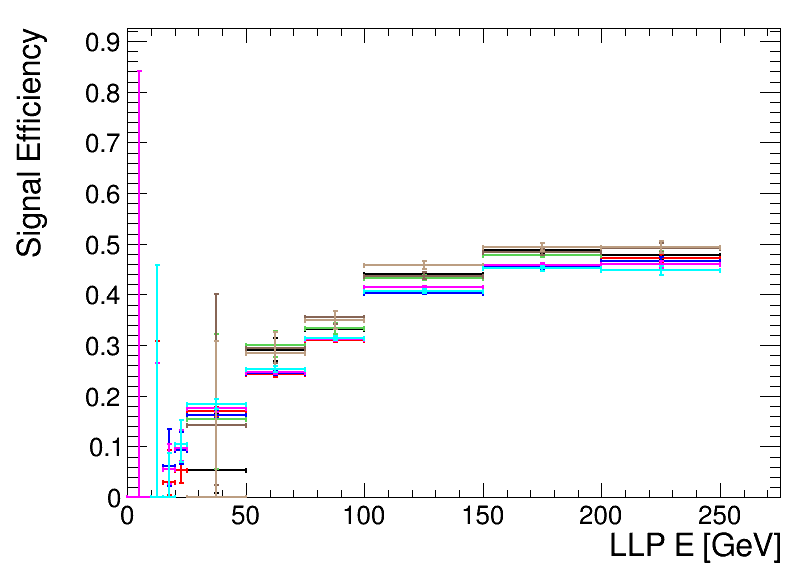

In [27]:
import numpy.ma as ma
import ROOT as rt
import root_numpy
# import importlib
# importlib.reload(sys.modules['histo_utilities'])
# from histo_utilities import std_color_list




nominator = [clusterR,clusterZ,clusterE,clusterPz,clusterEz,clusterGamma, clusterP, clusterEMFracP, clusterEMFracPz, clusterEMFracE, clusterEMFracEz,\
            clusterEMP,clusterEMPz, clusterEME, clusterEMEz,clusterHadP,clusterHadPz,clusterHadE,clusterHadEz,cluster_visFracE, higgsPt_nom, cluster_multiplicity]
denominator = [llp_r,llp_z,llp_e,llp_pz,llp_ez,llp_gamma,llp_p, llp_emfracP, llp_emfracPz, llp_emfracE, llp_emfracEz,\
              llp_EMP,llp_EMPz,llp_EME,llp_EMEz,llp_HadP,llp_HadPz,llp_HadE,llp_HadEz,llp_visFracE, higgsPt_denom,llp_multiplicity]
# bins = [[20,100,700], [35, 550, 1075],  [50,0,500], [50,0,500],[50,0,500],[50,0,100],[50,0,500]]
bins = [[20,100,700], [70, -1275, 1275],  [25,0,500], [25,0,500],[25,0,500],[25,0,100],[25,0,500],[25,0,1], [25,0,1], [25,0,1], [25,0,1],\
       [25,0,500], [25,0,500], [25,0,500], [25,0,500],[25,0,500], [25,0,500], [25,0,500], [25,0,500],[50,0,1]]
bins = [[60,0,700], [70, 400, 1275], [0, 25,50,75,100,150,200,250], [25,0,500],[25,0,500],[25,0,100],[0, 25,50,75,100,150,200,250],[25,0,1], [25,0,1], [100,0,1], [25,0,1],\
       [25,0,500], [25,0,500], [0,25,50,75,100,125,150, 200], [25,0,500],[25,0,500], [25,0,500], [25,0,500], [25,0,500],[20,0,1],[50,0,2000],[100,0,100]]

bins = [[60,0,700], [70, 400, 1275], [0, 25,50,75,100, 150,200,250], [25,0,500],[25,0,500],[25,0,100],[0, 25,50,75,100,150,200,250],[25,0,1], [25,0,1], [100,0,1], [25,0,1],\
       [25,0,500], [25,0,500], [0,25,50,75,100,125,150, 200], [25,0,500],[25,0,500], [25,0,500], [0,25,50,75,100,150,200,250], [25,0,500],[20,0,1],[50,0,2000],[100,0,100]]


bins = [[60,0,700], [70, 400, 1275], [0, 25,50,75,100, 150,250], [25,0,500],[25,0,500],[25,0,100],[0, 25,50,75,100,150,200,250],[25,0,1], [25,0,1], [100,0,1], [25,0,1],\
       [25,0,500], [25,0,500], [0,25,50,75,100,125,150, 200], [25,0,500],[25,0,500], [25,0,500], [0,25,50,75,100,150,200,250], [25,0,500],[20,0,1],[50,0,2000],[100,0,100]]


xaxis = ['LLP decay R [cm]','LLP decay Z [cm]','LLP E [GeV]','LLP p_{Z} [GeV]','LLP Ez [GeV]','LLP #gamma','LLP p [GeV]','EM P fraction', \
         'EM Pz fraction', 'EM E fraction', 'EM Ez fraction','EM P', 'EM Pz', 'EM E', 'EM Ez','Had P', 'Had Pz', 'Had E', 'Had Ez','visible energy fraction','higgsPt','multiplicity']
assert(len(denominator)==len(nominator)==len(bins)==len(xaxis))
index = 2



hm = {}
hb = {}
pEff = {}
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.60,0.15, 0.85,0.35)
leg = rt.TLegend(0.23,0.7,0.43,0.90)
# leg = rt.TLegend(0.7,0.7,0.9,0.9)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
j = 0
for i, m in enumerate(tree.keys()):
#     
#     if  m == 'HNL':continue
#     if index == 7 and not m == '5':continue
#     if not '15' in m:continue
#     if not 'v2' in m and not 'HNL' in m:continue
#     if not '4Tau_m15_' in m and not 'v2' in m:continue

#     if not '4Tau_m' in m or '10' in m:continue
    if not 'ggH_HToSS_SToPiPlusPiMinus' in m:continue
#     if '10000' in m or '100000' in m or 'dddd' in m:continue
        
#     if not 'm15_10' in m :continue
#     if '10' in m:continue
#     if not m == '4Tau':continue

    print(m)
  

    region = 'b'
  
    if region == 'a':
        cond = np.abs(clusterR[m])>390
        cond_b = np.abs(llp_r[m])>390
        cond = np.logical_and(cond, np.abs(clusterZ[m])<671)
        cond_b = np.logical_and(cond_b, np.abs(llp_z[m])<671)
        bins = [[60,0,700], [70, 400, 1275], [0, 25,50,75,100, 150,250], [25,0,500],[25,0,500],[25,0,100],[0, 25,50,75,100,150,200,250],[25,0,1], [25,0,1], [100,0,1], [25,0,1],\
       [25,0,500], [25,0,500], [0,25,50,75,100,125,150, 200], [25,0,500],[25,0,500], [25,0,500], [0,25,50,75,100,150,200,250], [25,0,500],[20,0,1],[50,0,2000],[100,0,100]]

    elif region == 'b':
        cond = np.abs(clusterZ[m])>671
        cond_b = np.abs(llp_z[m])>671
  
        bins = [[60,0,700], [70, 400, 1275], [0, 25,50,75,100, 150,200,250], [25,0,500],[25,0,500],[25,0,100],[0, 25,50,75,100,150,200,250],[25,0,1], [25,0,1], [100,0,1], [25,0,1],\
       [25,0,500], [25,0,500], [0,25,50,75,100,125,150, 200], [25,0,500],[25,0,500], [25,0,500], [0,25,50,75,100,150,200,250], [25,0,500],[20,0,1],[50,0,2000],[100,0,100]]
    bins = [[60,0,700], [70, 400, 1275], [0,10,15,20,25,50,75,100, 150,200,250], [25,0,500],[25,0,500],[25,0,100],[0, 25,50,75,100,150,200,250],[25,0,1], [25,0,1], [100,0,1], [25,0,1],\
       [25,0,500], [25,0,500], [0,25,50,75,100,125,150, 200], [25,0,500],[25,0,500], [25,0,500], [0,25,50,75,100,150,200,250], [25,0,500],[20,0,1],[50,0,2000],[100,0,100]]

    cond = np.logical_and(cond, np.abs(cluster_llp_eta[m])<2)
    cond_b = np.logical_and(cond_b,np.abs(llp_eta[m])<2)
    
    
    cond= np.logical_and(cond, clusterme1112[m]==0)
    cond= np.logical_and(cond, re12[m]==0)
    cond= np.logical_and(cond, rb1[m]==0)
    cond= np.logical_and(cond, mb1[m]==0)
    cond= np.logical_and(cond, timeSpread[m]<20)
    cond= np.logical_and(cond, muonVeto[m]<20)



    
    hm[m] = create_TH1D(np.abs(nominator[index][m][cond]), 'l', axis_title = [xaxis[index],'Signal Efficiency'], binning=bins[index])
    hb[m] = create_TH1D(np.abs(denominator[index][m][cond_b]), 'l', axis_title = [xaxis[index],'Signal Efficiency'], binning=bins[index])
    
    pEff[m] = rt.TEfficiency(hm[m],hb[m])
    pEff[m].SetLineColor(std_color_list[j])
    pEff[m].SetLineWidth(2)
    pEff[m].SetMarkerSize(0)
    leg.AddEntry(pEff[m], m)
    pEff[m].Draw('' if j == 0 else 'same')
  

    j+=1

c.Draw()


ymax = 0.001
xmax = 0.001
ymin = 10000
xmin = 10000
for m in pEff.keys():
    ymax = max(ymax, pEff[m].GetPaintedGraph().GetHistogram().GetMaximum())
    ymin = min(ymin, pEff[m].GetPaintedGraph().GetHistogram().GetMinimum())
    xmin = min(xmin, pEff[m].GetPaintedGraph().GetHistogram().GetXaxis().GetXmin())
    xmax = max(xmax, pEff[m].GetPaintedGraph().GetHistogram().GetXaxis().GetXmax())
ymin = max(0,ymin)
pEff[list(pEff.keys())[0]].GetPaintedGraph().GetHistogram().SetMaximum(ymax)
pEff[list(pEff.keys())[0]].GetPaintedGraph().GetHistogram().SetMinimum(ymin)
pEff[list(pEff.keys())[0]].GetPaintedGraph().GetHistogram().GetXaxis().SetRangeUser(xmin,xmax)

# pEff[list(pEff.keys())[0]].GetPaintedGraph().GetHistogram().SetBins(10,0.,10.)


# leg.Draw()

pEff[list(pEff.keys())[0]].GetPaintedGraph().GetHistogram().SetMinimum(0.0)




# Cluster Efficiency Plot (Additional Figure 7)

### produce plot pdf

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: hb1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hb1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hb1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hb1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hb1 (Potential memory leak).


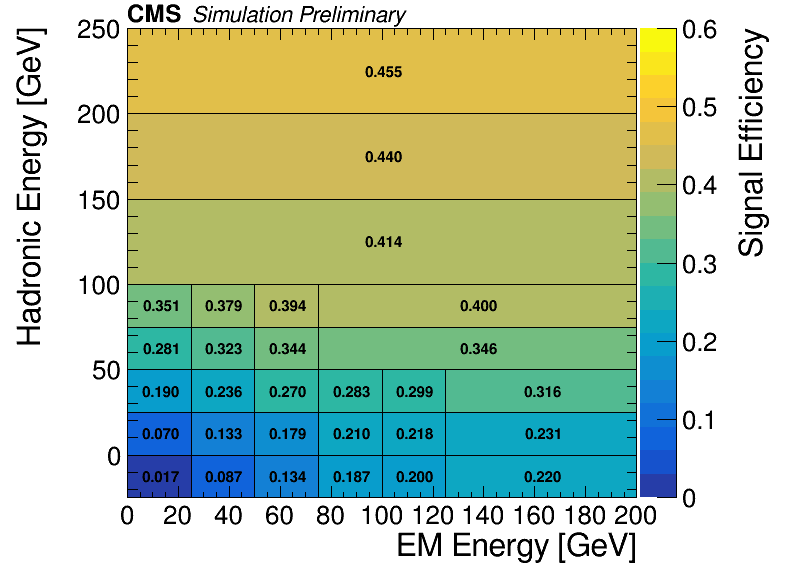

In [13]:

correction = 0.90898
rt.gStyle.SetPaintTextFormat("6.3f")
nominator = [ clusterEME,clusterHadE]
denominator = [llp_EME,llp_HadE]

bins = {'a':[[0, 25,50,100,200], [0, 0,25,50,75,100, 150, 250]], 'b':[[0,25,50,75,100,125, 200],  [0,0,25,50,75,100,150,200,250]]}

bins_plot = {'a':[[0, 25,50,100,200], [-25, 0,25,50,75,100, 150, 250]],'b':[ [0,25,50,75,100,125, 200],  [-25,0,25,50,75,100,150,200,250]]}

xaxis = [ 'EM Energy [GeV]', 'Hadronic Energy [GeV]']

assert(len(denominator)==len(nominator)==len(bins)==len(xaxis))
index = [0,1]
hm = {}
hb = {}
pEff = {}
eff_hist = {}
eff_histUp = {}
eff_histDown = {}
h2p = {}
h2pUp = {}
h2pDown = {}



nCsc_cut = 130
for i,m in enumerate(tree.keys()):
    if not m == '4Tau':continue

    c = rt.TCanvas('c','c', 800, 600)

    

    for region in ['a','b']:
#         if not region == 'b':continue

        bins_temp = bins[region][index[0]]+bins[region][index[1]]+[len(bins[region][index[0]])]+[len(bins[region][index[1]])]
        bins_plot_temp = bins_plot[region][index[0]]+bins_plot[region][index[1]]+[len(bins_plot[region][index[0]])]+[len(bins_plot[region][index[1]])]
        key = m+'_'+region+'_'+str(nCsc_cut)
        if region == 'a':
            condm = np.abs(clusterR[m])>390
            condb = np.abs(llp_r[m])>390
            condm = np.logical_and(condm, np.abs(clusterZ[m])<671)
            condb = np.logical_and(condb, np.abs(llp_z[m])<671)
        elif region == 'b':
            condm = np.abs(clusterZ[m])>671
            condb = np.abs(llp_z[m])>671

        condm = np.logical_and(condm, np.abs(cluster_llp_eta[m])<2)
        condb = np.logical_and(condb,np.abs(llp_eta[m])<2)

        condm= np.logical_and(condm, clusterme1112[m]==0)
        condm= np.logical_and(condm, re12[m]==0)
        condm= np.logical_and(condm, rb1[m]==0)
        condm= np.logical_and(condm, mb1[m]==0)
        condm= np.logical_and(condm, timeSpread[m]<20)
        condm= np.logical_and(condm, muonVeto[m]<20)
        condm= np.logical_and(condm, clusterSize[m]>=nCsc_cut)


        hm[key] = create_TH2D(np.column_stack((nominator[index[0]][m][condm],nominator[index[1]][m][condm])), 'hb1',\
                                 axis_title = [xaxis[index[0]],xaxis[index[1]],'Signal Efficiency'], binning=bins_temp)
        hb[key] = create_TH2D(np.column_stack((denominator[index[0]][m][condb],denominator[index[1]][m][condb])), 'hb1', axis_title = [xaxis[index[0]],xaxis[index[1]],'Signal Efficiency'], \
                              binning=bins_temp)

        eff_hist[key] = create_TH2D(np.column_stack((nominator[index[0]][m][condm],nominator[index[1]][m][condm])), 'hb1',\
                                 axis_title = [xaxis[index[0]],xaxis[index[1]],'Signal Efficiency'], binning=bins_plot_temp)
        eff_histUp[key] = eff_hist[key].Clone()
        eff_histDown[key] = eff_hist[key].Clone()
        
        pEff[key] = rt.TEfficiency(hm[key],hb[key])
        pEff[key].SetLineWidth(2)
        
        if region == 'a':
            for y in range(1, eff_hist[key].GetYaxis().GetNbins()+1):
                if y>=5:
                    n1 = 0
                    n2 = 0
                    for x in range(1, eff_hist[key].GetXaxis().GetNbins()+1):
                        n1 += hm[key].GetBinContent(x,y)
                        n2 += hb[key].GetBinContent(x,y)
                for x in range(1, eff_hist[key].GetXaxis().GetNbins()+1):
                    ratio = 0
                    errLow = 0
                    errHigh = 0

                    if y < 5:
                        n1 = hm[key].GetBinContent(x,y)
                        n2 = hb[key].GetBinContent(x,y)
                    if n1 > n2: n1 = n2
                    if n2>0:
                        ratio = 1.0 * n1/n2
                        if ratio > 1: ratio = 1
                        errLow = ratio - rt.TEfficiency.ClopperPearson(n2, n1, 0.68269, False);
                        errHigh = rt.TEfficiency.ClopperPearson(n2, n1, 0.68269, True) - ratio
                    eff_histUp[key].SetBinContent(x,y,errHigh*correction)
                    eff_histDown[key].SetBinContent(x,y,errLow*correction)
                    eff_hist[key].SetBinContent(x,y,ratio*correction)
                    
        else:
            for y in range(1, eff_hist[key].GetYaxis().GetNbins()+1):
                n1 = 0
                n2 = 0
                if y>=6:
                    for x in range(1, eff_hist[key].GetXaxis().GetNbins()+1):
                        n1 += hm[key].GetBinContent(x,y)
                        n2 += hb[key].GetBinContent(x,y)

                for x in range(1, eff_hist[key].GetXaxis().GetNbins()+1):
                    ratio = 0
                    errLow = 0
                    errHigh = 0

                    if (y < 6 and x <= 3) or y <=3:
                        n1 = hm[key].GetBinContent(x,y)
                        n2 = hb[key].GetBinContent(x,y)
                    elif y>=4 and y < 6:
                        n1 = hm[key].GetBinContent(4,y) + hm[key].GetBinContent(5,y) + hm[key].GetBinContent(6,y)
                        n2 = hb[key].GetBinContent(4,y) + hb[key].GetBinContent(5,y) + hb[key].GetBinContent(6,y)
#                         print(x,y)
#                     else:
#                         print(x,y,n1,n2)
                    if n1 > n2: n1 = n2
                    if n2>0:
                        ratio = 1.0 * n1/n2
                        if ratio > 1: ratio = 1
                        errLow = ratio - rt.TEfficiency.ClopperPearson(n2, n1, 0.68269, False);
                        errHigh = rt.TEfficiency.ClopperPearson(n2, n1, 0.68269, True) - ratio
                    eff_histUp[key].SetBinContent(x,y,errHigh*correction)
                    eff_histDown[key].SetBinContent(x,y,errLow*correction)
                    eff_hist[key].SetBinContent(x,y,ratio*correction)

        h2p[key] = rt.TH2Poly()
        h2pUp[key] = rt.TH2Poly()
        h2pDown[key] = rt.TH2Poly()

        if region == 'a':
            for i_y, y in enumerate(bins_plot[region][1]):
                if i_y == len(bins_plot[region][1])-1:continue
                if i_y > 3:
                    print(x,y)
                    h2p[key].AddBin(bins_plot[region][0][0], y, bins_plot[region][0][-1], bins_plot[region][1][i_y+1])
                    h2pUp[key].AddBin(bins_plot[region][0][0], y, bins_plot[region][0][-1], bins_plot[region][1][i_y+1])
                    h2pDown[key].AddBin(bins_plot[region][0][0], y, bins_plot[region][0][-1], bins_plot[region][1][i_y+1])
                    binNum = h2p[key].FindBin((bins_plot[region][0][0]+bins_plot[region][0][-1])/2, (y+bins_plot[region][1][i_y+1])/2)
                    h2p[key].SetBinContent(binNum, eff_hist[key].GetBinContent(1, i_y+1))
                    h2pUp[key].SetBinContent(binNum, eff_histUp[key].GetBinContent(1, i_y+1))
                    h2pDown[key].SetBinContent(binNum, eff_histDown[key].GetBinContent(1, i_y+1))

                else:
                    for i_x, x in enumerate(bins_plot[region][0]):
                        if i_x == len(bins_plot[region][0])-1:continue


                        h2p[key].AddBin(x, y, bins_plot[region][0][i_x+1], bins_plot[region][1][i_y+1])
                        h2pUp[key].AddBin(x, y, bins_plot[region][0][i_x+1], bins_plot[region][1][i_y+1])
                        h2pDown[key].AddBin(x, y, bins_plot[region][0][i_x+1], bins_plot[region][1][i_y+1])
#                         if eff_hist[key].GetBinContent(i_x+1, i_y+1)<=0.0:continue


                        binNum = h2p[key].FindBin((x+ bins_plot[region][0][i_x+1])/2, (y+bins_plot[region][1][i_y+1])/2)
                        h2p[key].SetBinContent(binNum, eff_hist[key].GetBinContent(i_x+1, i_y+1))
                        h2pUp[key].SetBinContent(binNum, eff_histUp[key].GetBinContent(i_x+1, i_y+1))
                        h2pDown[key].SetBinContent(binNum, eff_histDown[key].GetBinContent(i_x+1, i_y+1))
        else:
            for i_y, y in enumerate(bins_plot[region][1]):
                if i_y == len(bins_plot[region][1])-1:continue
                if i_y > 4:
                    h2p[key].AddBin(bins_plot[region][0][0], y, bins_plot[region][0][-1], bins_plot[region][1][i_y+1])
                    h2pUp[key].AddBin(bins_plot[region][0][0], y, bins_plot[region][0][-1], bins_plot[region][1][i_y+1])
                    h2pDown[key].AddBin(bins_plot[region][0][0], y, bins_plot[region][0][-1], bins_plot[region][1][i_y+1])
                    binNum = h2p[key].FindBin((bins_plot[region][0][0]+bins_plot[region][0][-1])/2, (y+bins_plot[region][1][i_y+1])/2)
                    h2p[key].SetBinContent(binNum, eff_hist[key].GetBinContent(1, i_y+1))
                    h2pUp[key].SetBinContent(binNum, eff_histUp[key].GetBinContent(1, i_y+1))
                    h2pDown[key].SetBinContent(binNum, eff_histDown[key].GetBinContent(1, i_y+1))
                else:
                    for i_x, x in enumerate(bins_plot[region][0]):
                        if i_x == len(bins_plot[region][0])-1:continue
                        if i_y > 2 and i_x >=3:
                            if i_x>3:continue
                            h2p[key].AddBin(x, y, bins_plot[region][0][-1], bins_plot[region][1][i_y+1])
                            h2pUp[key].AddBin(x, y, bins_plot[region][0][-1], bins_plot[region][1][i_y+1])
                            h2pDown[key].AddBin(x, y, bins_plot[region][0][-1], bins_plot[region][1][i_y+1])
                            binNum = h2p[key].FindBin((x+ bins_plot[region][0][-1])/2, (y+bins_plot[region][1][i_y+1])/2)
                            h2p[key].SetBinContent(binNum, eff_hist[key].GetBinContent(i_x+1, i_y+1))
                            h2pUp[key].SetBinContent(binNum, eff_hist[key].GetBinContent(i_x+1, i_y+1))
                            h2pDown[key].SetBinContent(binNum, eff_hist[key].GetBinContent(i_x+1, i_y+1))
                        else:
#                             if eff_hist[key].GetBinContent(i_x+1, i_y+1)<=0.0:continue


                            h2p[key].AddBin(x, y, bins_plot[region][0][i_x+1], bins_plot[region][1][i_y+1])
                            h2pUp[key].AddBin(x, y, bins_plot[region][0][i_x+1], bins_plot[region][1][i_y+1])
                            h2pDown[key].AddBin(x, y, bins_plot[region][0][i_x+1], bins_plot[region][1][i_y+1])
                            binNum = h2p[key].FindBin((x+ bins_plot[region][0][i_x+1])/2, (y+bins_plot[region][1][i_y+1])/2)
                            h2p[key].SetBinContent(binNum, eff_hist[key].GetBinContent(i_x+1, i_y+1))
                            h2pUp[key].SetBinContent(binNum, eff_histUp[key].GetBinContent(i_x+1, i_y+1))
                            h2pDown[key].SetBinContent(binNum, eff_histDown[key].GetBinContent(i_x+1, i_y+1))
                            

        for b in  h2p[key].GetBins():
            b.GetPolygon().SetLineWidth(0)

        if region == 'b':h2p[key].SetMaximum(0.6)
        else:h2p[key].SetMaximum(0.2)
        h2p[key].SetMinimum(0.0)
        h2p[key].SetMarkerSize(1.4)
        h2p[key].GetXaxis().SetTitle(xaxis[0])
        h2p[key].GetYaxis().SetTitle(xaxis[1])
        h2p[key].GetZaxis().SetTitle('Signal Efficiency')
        h2p[key].Draw('colz text ')
        
        c.SetRightMargin(0.2)
        
        CMS_lumi.cmsText     = "CMS"
        CMS_lumi.writeExtraText = 1
        CMS_lumi.extraText   = "Simulation Supplementary"
        CMS_lumi.extraText   = "Simulation Preliminary"
        CMS_lumi.relPosX = 0.12
        CMS_lumi.CMS_lumi(c, 0, 0)
    
        c.Draw()
        outDir = '/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/supplementary/cluster_eff/'+version+'/'
        if not os.path.isdir(outDir): os.makedirs(outDir)
        file_name = outDir+m+'_region'+region.capitalize()+'nRechits'+str(nCsc_cut)
        
        if correction <1:file_name += '_correction'
        if CMS_lumi.writeExtraText and CMS_lumi.extraText == 'Simulation Preliminary': file_name += "_pas"
        if CMS_lumi.writeExtraText and CMS_lumi.extraText == 'Simulation Supplementary': file_name += "_supplementary"
            
        c.SaveAs(file_name + '.png')
        c.SaveAs(file_name + '.pdf')
        c.SaveAs(file_name + '.C')






### save to ROOT file

In [9]:

outputFileName = '/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/supplementary/'+version+'/cluster_eff_'+str(nCsc_cut)+'_correction.root'
print(outputFileName)

outFile = rt.TFile(outputFileName, 'UPDATE')
for m in eff_hist.keys():
    print(m)
    if not '4Tau' in m:continue
    outFile.WriteTObject(eff_hist[m], 'h_'+m, 'WriteDelete')
    outFile.WriteTObject(eff_histUp[m], 'h_'+m+'Up', 'WriteDelete')
    outFile.WriteTObject(eff_histDown[m], 'h_'+m+'Down', 'WriteDelete')
    outFile.WriteTObject(h2p[m], 'h_poly_'+m, 'WriteDelete')
    outFile.WriteTObject(h2pUp[m], 'h_poly_'+m+'Up', 'WriteDelete')
    outFile.WriteTObject(h2pDown[m], 'h_poly_'+m+'Down', 'WriteDelete')
outFile.Close();

/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/supplementary/v114/cluster_eff_130_correction.root
4Tau_a
4Tau_b


### create Y slice (show uncertainty)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/supplementary/cluster_eff_slice/v114/4Tau_anRechits130_bin1.png has been created
Info in <TCanvas::Print>: pdf file /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/supplementary/cluster_eff_slice/v114/4Tau_anRechits130_bin1.pdf has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/supplementary/cluster_eff_slice/v114/4Tau_anRechits130_bin1.C has been generated
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/supplementary/cluster_eff_slice/v114/4Tau_anRechits130_bin2.png has been created
Info in <TCanvas::Print>: 

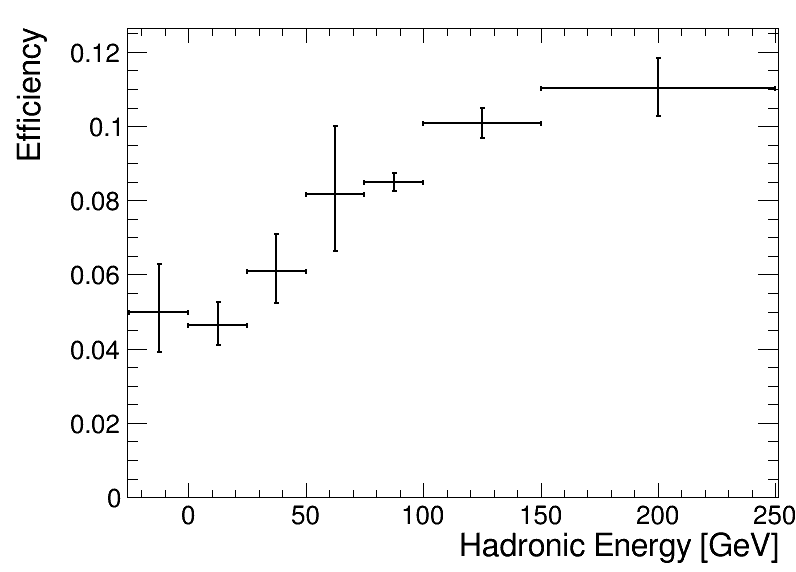

In [43]:
key = '4Tau_a'


for b in range(1, eff_hist[key].GetNbinsX()+1):
    canvas = rt.TCanvas('c','c', 800, 600)
    nbins = eff_hist[key].GetNbinsY()
    x = []
    y = []
    xErrLow = []
    xErrHigh = []
    yErrLow = []
    yErrHigh = []

    for c in range(nbins):
        x.append(eff_hist[key].GetYaxis().GetBinCenter(c+1))
        xErrLow.append(eff_hist[key].GetYaxis().GetBinCenter(c+1) - eff_hist[key].GetYaxis().GetBinLowEdge(c+1)) 
        xErrHigh.append(eff_hist[key].GetYaxis().GetBinUpEdge(c+1) - eff_hist[key].GetYaxis().GetBinCenter(c+1))

        y.append(eff_hist[key].GetBinContent(b,c+1))
        yErrLow.append(eff_histDown[key].GetBinContent(b,c+1))
        yErrHigh.append(eff_histUp[key].GetBinContent(b,c+1))






    efficiency = rt.TGraphAsymmErrors(nbins, array("d", x), array("d", y), array("d", xErrLow), array("d", xErrHigh),array("d", yErrLow) ,array("d", yErrHigh) )
    efficiency.GetYaxis().SetTitle('Efficiency')

    efficiency.GetXaxis().SetTitle('Hadronic Energy [GeV]')
    efficiency.SetLineWidth(2)
    efficiency.Draw('AP')
    canvas.Draw()


    # efficiency.GetHistogram().SetMaximum(1.0)
    efficiency.GetHistogram().SetMinimum(0.0)
    efficiency.GetHistogram().GetXaxis().SetRangeUser(-25,250)
    canvas.SetRightMargin(0.022)

    canvas.Draw()

    
    outDir = '/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/supplementary/cluster_eff_slice/'+version+'/'
    if not os.path.isdir(outDir): os.makedirs(outDir)    
    file_name = outDir+key+'nRechits'+str(nCsc_cut)+'_bin'+str(b)

    canvas.SaveAs(file_name + '.png')
    canvas.SaveAs(file_name + '.pdf')
    canvas.SaveAs(file_name + '.C')






## ratio of 2D efficiency

4Tau_b_130 4Tau_b_50


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


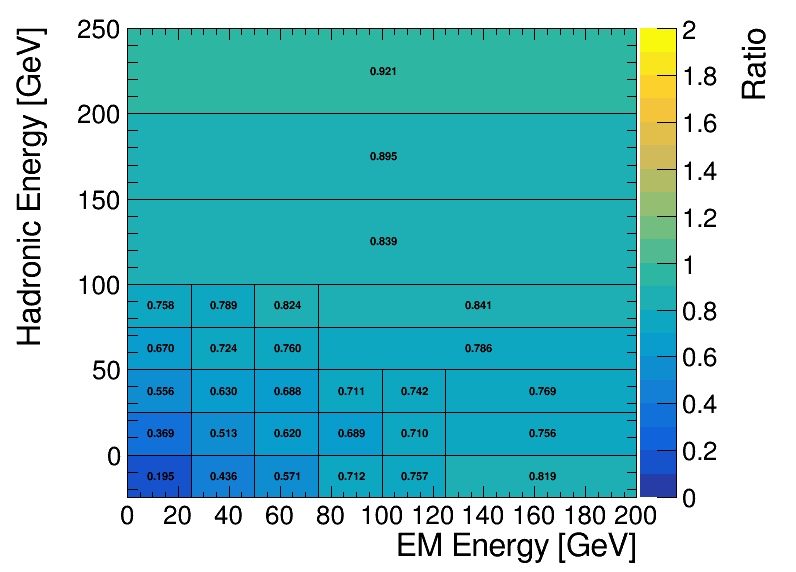

In [16]:

rt.gStyle.SetPaintTextFormat("6.3f");


for nom in h2p.keys():
    for denom in h2p.keys():
        
        if not (nom == '4Tau_b_130' and denom == '4Tau_b_50') :continue
        print(nom, denom)
#         for region in ['a', 'b', 'c']:
        if not region == 'b':continue
        c = rt.TCanvas('c','c', 800, 600)
        ratio = h2p[nom].Clone()
        ratio.Divide(h2p[denom])
        ratio.GetZaxis().SetTitle('Ratio')
        ratio.SetMaximum(2)
        ratio.SetMinimum(0.0)
        ratio.SetMarkerSize(1.0)
        ratio.Draw('colz text')
        c.SetRightMargin(0.2)
        # c.SetBottomMargin(0.2)


        c.Draw()
#             outDir = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/supplementary/ratio/'
#             c.SaveAs(outDir+nom+'_'+denom+'_ratio_region'+region.capitalize()+'nRechits'+str(nCsc_cut)+'.png')
#             c.SaveAs(outDir+nom+'_'+denom+'_ratio_region'+region.capitalize()+'nRechits'+str(nCsc_cut)+'.C')

#             c.SaveAs(outDir+nom+'_'+denom+'_ratio_region'+region.capitalize()+'nRechits'+str(nCsc_cut)+'.pdf')


### check accuracy of signal yield prediction using parameterization vs full-sim preduction (Table 53/54 in AN-19-154)

In [13]:
print(version)

v114


In [29]:
# use the denominator of different samples, find the efficiency in 2D
nCsc_cut = 130
useJetVeto = False
if useJetVeto:source_file1 = uproot.open('/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/supplementary/'+version+'/cluster_eff_'+str(nCsc_cut)+'_withJetVeto.root')
else:source_file1 = uproot.open('/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/supplementary/'+version+'/cluster_eff_'+str(nCsc_cut)+'_correction.root')

wt = {}
observed = {}
wt_err = {}
observed_err = {}
# for k in tree.keys():
for k in ['4Tau']:
    for m in tree.keys():
        wt[k+'_'+m] = 0.0
        observed[k+'_'+m] = 0.0
        wt_err[k+'_'+m] = 0.0
        observed_err[k+'_'+m] = 0.0
        
for region in ['a','b','c']:
    if not region =='a':continue
    for source in ['4Tau']:
        eff_hist = source_file1['h_'+source+'_'+region]

        weight = {}
        for m in tree.keys():   
            weight[m]=eff_hist.values[np.argmax(eff_hist.edges[0]>llp_EME[m][:,None],axis=1)-1, np.argmax(eff_hist.edges[1]>np.abs(llp_HadE[m])[:,None],axis=1)-1]
            weight[m][llp_HadE[m]==0.0] = eff_hist.values[np.argmax(eff_hist.edges[0]>llp_EME[m][llp_HadE[m]==0][:,None],axis=1)-1, 0]
            
            if region == 'a':
                condm = np.abs(clusterR[m])>390
                condb = np.abs(llp_r[m])>390
                condm = np.logical_and(condm, np.abs(clusterZ[m])<671)
                condb = np.logical_and(condb, np.abs(llp_z[m])<671)
            elif region == 'b':
                condm = np.abs(clusterZ[m])>671
                condb = np.abs(llp_z[m])>671
          
            condm = np.logical_and(condm, np.abs(cluster_llp_eta[m])<2)
            condb = np.logical_and(condb,np.abs(llp_eta[m])<2)
            condm= np.logical_and(condm, clusterme1112[m]==0)
            condm= np.logical_and(condm, re12[m]==0)
            condm= np.logical_and(condm, rb1[m]==0)
            condm= np.logical_and(condm, mb1[m]==0)
            condm= np.logical_and(condm, timeSpread[m]<20)
            condm= np.logical_and(condm, muonVeto[m]<20)
            condm= np.logical_and(condm, clusterSize[m]>=nCsc_cut)
            if useJetVeto: condm= np.logical_and(condm, jetVeto[m]<10)


            wt[source+'_'+m] += np.sum(weight[m][condb]) # parameterized siganl prediction
            observed[source+'_'+m] += np.count_nonzero(condm) # from the actual sample (full sim signal yield)
            wt_err[source+'_'+m] += np.sum(weight[m][condb]**2)**0.5 # parameterized siganl prediction uncertainty
            observed_err[source+'_'+m] += np.count_nonzero(condm)**0.5 # from the actual sample (full sim signal yield)

### print ratio between parameterized and full-simulation signal yield

In [30]:
correction = 0.90898
for source in ['4Tau']:
    for target in tree.keys():
        n1 = wt[source+'_'+target]
        n2 = correction*observed[source+'_'+target]
        if n2 == 0:continue
        ratio = 1.0*n1/n2
        err = ((wt_err[source+'_'+target]/n1)**2+(correction*observed_err[source+'_'+target]/n2)**2)**0.5*ratio
        print(target, '\t', round(ratio,3), '+/-', round(err,3))


4Tau 	 1.0 +/- 0.008
ggH_HToSS_STodd_ms3p0_pl500 	 1.233 +/- 0.044
ggH_HToSS_STodd_ms3p0_pl100 	 1.233 +/- 0.044
ggH_HToSS_SToGlueGlue_ms3p0_pl100 	 1.259 +/- 0.028
ggH_HToSS_SToPi0Pi0_ms0p4_pl10 	 1.302 +/- 0.053
ggH_HToSS_SToPi0Pi0_ms0p4_pl50 	 1.057 +/- 0.025
ggH_HToSS_SToEE_ms0p4_pl10 	 1.456 +/- 0.069
ggH_HToSS_SToEE_ms0p4_pl50 	 1.175 +/- 0.032
ggH_HToSS_SToEE_ms1p0_pl125 	 1.19 +/- 0.03
ggH_HToSS_SToEE_ms1p0_pl25 	 1.42 +/- 0.067
ggH_HToSS_SToEE_ms2p0_pl250 	 1.172 +/- 0.041
ggH_HToSS_SToEE_ms2p0_pl50 	 1.258 +/- 0.054
ggH_HToSS_SToEE_ms4p0_pl100 	 0.567 +/- 0.04
ggH_HToSS_SToEE_ms4p0_pl500 	 1.079 +/- 0.028
ggH_HToSS_SToGammaGamma_ms0p4_pl10 	 1.275 +/- 0.062
ggH_HToSS_SToGammaGamma_ms1p0_pl125 	 1.06 +/- 0.042
ggH_HToSS_SToGammaGamma_ms1p0_pl25 	 1.343 +/- 0.191
ggH_HToSS_SToGammaGamma_ms2p0_pl250 	 1.087 +/- 0.039
ggH_HToSS_SToGammaGamma_ms2p0_pl50 	 1.329 +/- 0.054
ggH_HToSS_SToGammaGamma_ms4p0_pl100 	 1.347 +/- 0.072
ggH_HToSS_SToPiPlusPiMinus_ms0p4_pl10 	 1.278 +/- 0.042
g

# calculate fraction of events in each region

In [42]:
events = {}
for m in tree.keys():
    events[m] = 0.0
    for region in ['a','b','c']:
        key = m+'_'+region
        if region == 'a':
            condm = np.abs(clusterR[m])>390
            condb = np.abs(llp_r[m])>390
            condm = np.logical_and(condm, np.abs(clusterZ[m])<671)
            condb = np.logical_and(condb, np.abs(llp_z[m])<671)
        elif region == 'b':
            condm = np.abs(clusterZ[m])>671
            condb = np.abs(llp_z[m])>671
        elif region == 'c':
            condm = np.abs(clusterR[m])<270
            condb = np.abs(llp_r[m])<270
            condm = np.logical_and(condm, np.abs(clusterZ[m])<671)
            condb = np.logical_and(condb, np.abs(llp_z[m])<671)

        condm = np.logical_and(condm, np.abs(cluster_llp_eta[m])<2)
        condb = np.logical_and(condb,np.abs(llp_eta[m])<2)


        condm= np.logical_and(condm, clusterme1112[m]==0)
        condm= np.logical_and(condm, re12[m]==0)
        condm= np.logical_and(condm, rb1[m]==0)
        condm= np.logical_and(condm, mb1[m]==0)
        condm= np.logical_and(condm, timeSpread[m]<20)
        condm= np.logical_and(condm, muonVeto[m]<20)
        events[m] += np.count_nonzero(condm)
        
for m in tree.keys():
    for region in ['a','b','c']:
#         if not region == 
        key = m+'_'+region
        if region == 'a':
            condm = np.abs(clusterR[m])>390
            condb = np.abs(llp_r[m])>390
            condm = np.logical_and(condm, np.abs(clusterZ[m])<671)
            condb = np.logical_and(condb, np.abs(llp_z[m])<671)
        elif region == 'b':
            condm = np.abs(clusterZ[m])>671
            condb = np.abs(llp_z[m])>671
        elif region == 'c':
            condm = np.abs(clusterR[m])<270
            condb = np.abs(llp_r[m])<270
            condm = np.logical_and(condm, np.abs(clusterZ[m])<671)
            condb = np.logical_and(condb, np.abs(llp_z[m])<671)

        condm = np.logical_and(condm, np.abs(cluster_llp_eta[m])<2)
        condb = np.logical_and(condb,np.abs(llp_eta[m])<2)


        condm= np.logical_and(condm, clusterme1112[m]==0)
        condm= np.logical_and(condm, re12[m]==0)
        condm= np.logical_and(condm, rb1[m]==0)
        condm= np.logical_and(condm, mb1[m]==0)
        condm= np.logical_and(condm, timeSpread[m]<20)
        condm= np.logical_and(condm, muonVeto[m]<20)
        
        
        print(key, '\t', np.count_nonzero(condm)/events[m])

ggH_HToSS_STodd_ms3p0_pl500_a 	 0.0845927229597888
ggH_HToSS_STodd_ms3p0_pl500_b 	 0.9126143015648315
ggH_HToSS_STodd_ms3p0_pl500_c 	 0.00279297547537973
ggH_HToSS_STodd_ms4p0_pl100_a 	 0.06913827655310621
ggH_HToSS_STodd_ms4p0_pl100_b 	 0.9236091230079206
ggH_HToSS_STodd_ms4p0_pl100_c 	 0.007252600438973185
ggH_HToSS_SToGammaGamma_ms0p4_pl10_a 	 0.05813416997323983
ggH_HToSS_SToGammaGamma_ms0p4_pl10_b 	 0.9417735535664852
ggH_HToSS_SToGammaGamma_ms0p4_pl10_c 	 9.227646027498385e-05
ggH_HToSS_SToGammaGamma_ms1p0_pl125_a 	 0.09674324665488512
ggH_HToSS_SToGammaGamma_ms1p0_pl125_b 	 0.9032567533451149
ggH_HToSS_SToGammaGamma_ms1p0_pl125_c 	 0.0
ggH_HToSS_SToGammaGamma_ms4p0_pl100_a 	 0.05681241757126915
ggH_HToSS_SToGammaGamma_ms4p0_pl100_b 	 0.9430861316830679
ggH_HToSS_SToGammaGamma_ms4p0_pl100_c 	 0.00010145074566298062
ggH_HToSS_SToGlueGlue_ms3p0_pl100_a 	 0.07045781925220768
ggH_HToSS_SToGlueGlue_ms3p0_pl100_b 	 0.9214943320598735
ggH_HToSS_SToGlueGlue_ms3p0_pl100_c 	 0.008047848687